
# DDoS Detection using Federated and Ensemble Learning- an Analysis study

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
df=pd.read_csv('final.csv')


In [4]:
df=df[:17000]

In [5]:
df=df.drop(['FLAGS'],axis=1)

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [7]:
df['PKT_TYPE']=label_encoder.fit_transform(df['PKT_TYPE'])
df['PKT_CLASS']=label_encoder.fit_transform(df['PKT_CLASS'])
df['NODE_NAME_TO']=label_encoder.fit_transform(df['NODE_NAME_TO'])
df['NODE_NAME_FROM']=label_encoder.fit_transform(df['NODE_NAME_FROM'])
print(df['PKT_TYPE'].unique())
print(df['NODE_NAME_FROM'].unique())
print(df['NODE_NAME_TO'].unique())
print(df['PKT_CLASS'].unique())

[3 0 1 2]
[ 1  0 46 45 17 35  2 38 22 15  4  9 18  6  8  3 47 37 43 20 14 29  7 21
 10 50 33 24 48 19 25 40 49  5 30 16 32 31 12 13 27 41 23 11 28 26 39 36
 42 34 44]
[ 0 36  2  1  4 16 18 37  6 10  8 14 20 17 35 15  9 38 19 33 39  5  7 40
  3 13 34 24 32 22 27 30 26 31 29 23 28 12 25 11 21]
[1 4 3 2 0]


In [8]:
X=df.drop(['PKT_CLASS'],axis=1)
Y=df['PKT_CLASS']

In [9]:
X=np.array(X)
Y=np.array(Y)

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train=scaler.fit_transform(X)

In [11]:
scaled_train

array([[0.11538462, 0.93461538, 0.60737576, ..., 0.46754471, 0.04      ,
        0.61200429],
       [0.57692308, 0.92884615, 0.31357818, ..., 0.26508242, 0.04      ,
        0.61212812],
       [0.92884615, 0.57692308, 0.09647468, ..., 0.09222276, 0.0412018 ,
        0.61257634],
       ...,
       [0.92692308, 0.03846154, 0.70267524, ..., 0.52933126, 0.04120064,
        0.61232551],
       [0.93846154, 0.15384615, 0.1191637 , ..., 0.11027061, 0.0412014 ,
        0.61250399],
       [0.53846154, 0.92846154, 0.75748923, ..., 0.56490271, 0.04      ,
        0.61212444]])

In [16]:
class MulticlassClassification:
    def __init__(self, input_dims, layers, num_classes):
        self.model = Sequential(name="server_model")
        self.model.add(Dense(
            layers[0],
            input_shape=(input_dims,),
            activation='relu'
        ))
        for l in layers[1:]:
            self.model.add(Dense(l, activation='relu'))
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )
        self.model.summary()

    # THIS WILL OVERWRITE ANY TRAINING
    def set_avg_weights(self, models):
        all_weights = np.array([
            model.model.get_weights()
                for model in models
        ])
        avg_weights = np.mean(all_weights, axis=0)
        self.model.set_weights(avg_weights)

    def fit(self, X, Y, epochs, batch_size):
        # print(pd.value_counts(Y.ravel()))
        self.model.fit(X, Y.ravel(), epochs=epochs, batch_size=batch_size)

    def predict(self, X, Y):
        # print(pd.value_counts(Y.ravel()))
        
        preds = self.model.predict(X)
        preds = [np.argmax(p) for p in preds]
        
        print(classification_report(Y, preds))
        # print(confusion_matrix(Y, preds))
        ConfusionMatrixDisplay.from_predictions(Y, preds)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [18]:
X_1, X_2, Y_1, Y_2 = train_test_split(X_train, Y_train, train_size=0.5, random_state=1)

In [19]:
model_sf_1 = MulticlassClassification(
    26,
    [20, 20, 20],
    num_classes=5
)
model_sf_1.fit(X_1, Y_1, epochs=20, batch_size=32)

Model: "server_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 5)                 105       
                                                                 
Total params: 1,485
Trainable params: 1,485
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
186/186 [==============================] - 1s 1ms/step - loss: 69240.1250 - accuracy: 0.8126
Epoch 2/20
186/186 [==============================] - 0s 1ms/step - loss: 2126.6

160/160 [==============================] - 0s 910us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.98      1.00      0.99      4563
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        33
           4       0.92      0.90      0.91       474

    accuracy                           0.98      5100
   macro avg       0.38      0.38      0.38      5100
weighted avg       0.96      0.98      0.97      5100



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


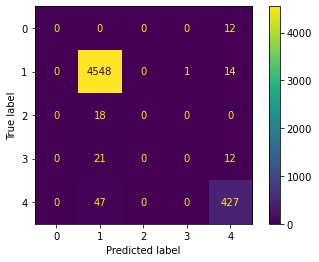

In [20]:
model_sf_1.predict(X_test, Y_test)

In [21]:
model_sf_2 = MulticlassClassification(
    26,
    [20, 20, 20],
    num_classes=5
)
model_sf_2.fit(X_2, Y_2, epochs=20, batch_size=32)

Model: "server_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                540       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 5)                 105       
                                                                 
Total params: 1,485
Trainable params: 1,485
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
186/186 [==============================] - 0s 1ms/step - loss: 19554.1035 - accuracy: 0.8408
Epoch 2/20
186/186 [==============================] - 0s 1ms/step - loss: 1914.1

160/160 [==============================] - 0s 794us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.89      1.00      0.94      4563
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00       474

    accuracy                           0.89      5100
   macro avg       0.18      0.20      0.19      5100
weighted avg       0.80      0.89      0.84      5100



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


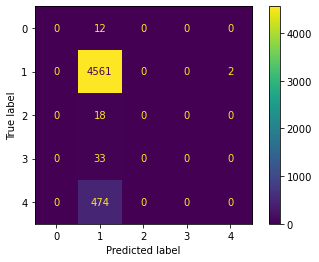

In [22]:
model_sf_2.predict(X_test, Y_test)

In [23]:
model_sf_3 = MulticlassClassification(
    26,
    [20, 20, 20],
    num_classes=5
)

Model: "server_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                540       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 5)                 105       
                                                                 
Total params: 1,485
Trainable params: 1,485
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_sf_3.set_avg_weights([model_sf_1, model_sf_2])

C:\Users\Acer\AppData\Local\Temp\ipykernel_12620\2802328577.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_weights = np.array([


160/160 [==============================] - 0s 750us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.89      0.99      0.94      4563
           2       0.00      0.00      0.00        18
           3       0.04      0.03      0.03        33
           4       0.00      0.00      0.00       474

    accuracy                           0.89      5100
   macro avg       0.19      0.20      0.20      5100
weighted avg       0.80      0.89      0.84      5100



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


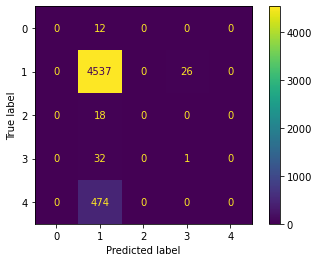

In [25]:
model_sf_3.predict(X_test, Y_test)